### Sources:

https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

https://mubaris.com/posts/kmeans-clustering/

The goal of this homework is to develop from scratch the K-means algorithm which will be used for clustering both synthetic and real-world data. 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from copy import deepcopy

## clustering synthetic data

we start by loading the data

In [2]:
file_name = "data_kmeans.txt"
data_dir = "Data/"

data = np.loadtxt(data_dir+file_name)
print(data.shape)

#random.shuffle(data)




data = data.transpose()
print(data.shape)

(300, 2)
(2, 300)


In [3]:
test = np.array([[1,2],[3,4],[5,6]])

print(test)

np.random.shuffle(test)

print(test)


[[1 2]
 [3 4]
 [5 6]]
[[3 4]
 [5 6]
 [1 2]]


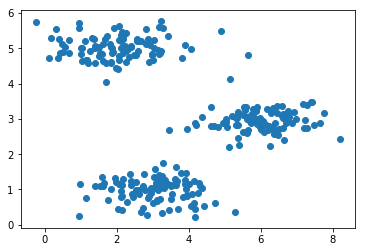

In [4]:
plt.scatter(data[0],data[1])

We can see that this is 2 dimensional data (X1,X2)

we now implement the K-means algorithm so that we can cluster this data

from the scatter plot above, we can see that there are a total of 3 clusters, so we will set our K value to 3 in our implementation


### Train test split

In [5]:
#train test split

split_level = 0.7
n_train = int(len(data[0])*split_level)


dataT= data
data = data.transpose()

#random.shuffle(data)

data_train = data[:n_train]
data_test =  data[n_train:]

train_data = data_train.transpose()

print(data_train.shape)
print(data_test.shape)

(210, 2)
(90, 2)


### generating our centroids randomly

In [6]:
#some parameters
K=3 #number of clusters



sd1 = int(data_train[0].max())
sd2 = int(data_train[1].max())

centroids = np.random.normal(0,sd1,2*K)

centroids = np.reshape(centroids,(K,2))
print(centroids)

[[-4.70930302 -5.02928876]
 [-3.15730924  2.65685692]
 [-0.81601769  3.85499614]]


### running the k-means algo

This is the big K-means algo that can run on any dimension of data that it is given as well as any number of centroids that we want. The algorithm itself is very simple and will run until convergence. The issue with K-means is that we are not garanteed to converge to a global minimum. Indeed, depending on the initialization of the centroids that we chose at the begining of the algorithm we will get different kind o results.

We initialize the centroids accoding to a multivariate normal distribution based on the mean of the data and its covariance matrix. This gives us good initialization parameters which should take less time to converge than taking a random value between the max and min.

Th algorithm continues until converge and can be described as so:

    While change in each centroid is not 0 (or very small)
        for each data point
            calculate distances to centroids
            d = 
            associate data point to smallest euclidian distance (argmin)

        for each centroid
            keep value of old centroid for calculating error
            recalculate centroid based on mean of all data poins associated to it

            calculate error (change in position of centroids) to see if we can stop

In [7]:
def k_means(K, data):
    """K means function, takes in the number of centroids K and the data that it needs to fit
       the data should be passed as a numpy array with dimensions (I,N) with N being nb features/dimensions and I the number of data samples
    """
    dataT = data.transpose()

    cov = np.cov(dataT)  # get covariance of data for centroid generation
    mean = np.mean(data, axis=0)  # get mean of each axis as well

    centroids = np.random.multivariate_normal(mean, cov, K)  # shape (K,N)
    old_centroids = np.zeros(centroids.shape)

    # loop time
    error = np.linalg.norm(centroids - old_centroids)

    Y = np.zeros((data.shape[0]))  # (I,1)
    d = np.zeros((K, 1))  # (K,N)

    # error represents the change of the centroids at each iteration
    while error != 0:
        # for each data sample
        for i, x in enumerate(data):
            # get distances to centroids
            for k, centroid in enumerate(centroids):
                # distance of x from each centroid
                d[k] = np.linalg.norm(x-centroid)
            # stores index of smallest value -> index of centroid
            Y[i] = np.argmin(d)

        # now we update the centroids
        for k, centroid in enumerate(centroids):
            # calculate mean  of labeled data points
            # keep copy for getting error later
            old_centroids[k] = deepcopy(centroid)
            points = [data[i] for i in range(len(data)) if Y[i] == k]

            # if nb of points for that centroid is >0, else we cant get the mean from 0 points
            if len(points) != 0:
                centroids[k] = np.mean(points, axis=0)

        error = np.linalg.norm(centroids-old_centroids)
        print("error:", error)
    return Y, centroids

In [8]:
def color_data(centroids, data):
    """ function where we pass it data and that data will be associated to a centroid based on its distance to it
        returns a vector Y of labels associated to the data points (color of the points)
    """
    Y = np.zeros((data.shape[0]))  # (I,1)
    d = np.zeros((K, 1))  # (K,N), distance of point x to centroids

    for i, x in enumerate(data):
        # get distances to centroids
        for k, centroid in enumerate(centroids):
            # distance of x from each centroid
            d[k] = np.linalg.norm(x-centroid)
        # stores index of smallest value -> index of centroid
        Y[i] = np.argmin(d)

    return Y

In [9]:
k = 3

Y,centroids = k_means(K,data)

error: 2.505503010686495
error: 1.7359812288770633
error: 0.9599176092380685
error: 0.0639911876372782
error: 0.0


0 [1.95399541 5.02557143]
1 [6.033667 3.000527]
2 [3.04367196 1.01540912]


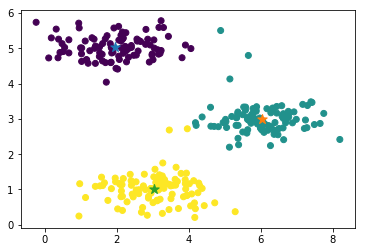

In [10]:
Y = color_data(centroids,data)

plt.scatter(dataT[0],dataT[1],c=Y)
for i,centroid in enumerate(centroids):
    print(i, centroid)
    plt.scatter(centroid[0],centroid[1],s=100,marker="*")

# clustering real world data


### reading the data

In [11]:
data_dir = "Data/"
file_name ="grade_students.csv"

data = pd.read_csv(data_dir+file_name)

In [12]:
print(data.head())

   g1freelunch  g1absent  g1readscore  g1mathscore  g1listeningscore  \
0            1         9          516          578               601   
1            0        12          451          507               584   
2            1         4          483          526               529   
3            1        15          516          505               556   
4            1         2          433          463               504   

   g1wordscore  
0          493  
1          436  
2          486  
3          536  
4          426  


In [13]:
print(data.shape)

(5550, 6)


In [14]:
#turn data from dataframe to numpy array

data = data.values
dataT = data.transpose()

In [15]:
K = 3

#
Y,centroids = k_means(K,data)


error: 85.44771742440086
error: 34.71146856831789
error: 23.85506141234657
error: 17.04469485700347
error: 13.16368428308568
error: 11.35151607295688
error: 8.577407523526833
error: 7.20709764224408
error: 5.346110339501545
error: 4.393128517912426
error: 3.527168486559672
error: 2.677908770343544
error: 2.0829385289848883
error: 1.3932889287384933
error: 1.1573007309893053
error: 1.08872201664589
error: 0.9333527784699468
error: 0.5991475306407962
error: 0.47314566227978383
error: 0.4665635830449122
error: 0.473192305363081
error: 0.3037626367130338
error: 0.16463638895879487
error: 0.3265696735777171
error: 0.27951557760282075
error: 0.26692519569487066
error: 0.24466382194217026
error: 0.2003783934264025
error: 0.20819168964158757
error: 0.09995300754782771
error: 0.1345495699875644
error: 0.0


In [16]:
print(Y)

[1. 0. 0. ... 1. 0. 2.]


0 [  0.72682661   8.66194111 464.48418757 491.58669575 541.39858233
 457.38604144]
1 [4.71982759e-01 6.92974138e+00 5.21748707e+02 5.35351724e+02
 5.69915517e+02 5.20566810e+02]
2 [2.52148997e-01 6.60816619e+00 5.95224928e+02 5.77361032e+02
 5.99065903e+02 5.80020057e+02]


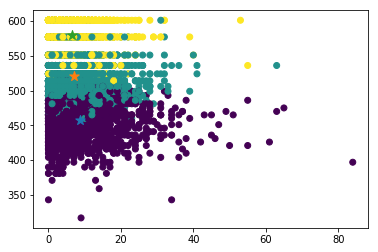

In [17]:

x1 =1
x2 =5

plt.scatter(dataT[x1],dataT[x2],c=Y)
for i,centroid in enumerate(centroids):
    print(i, centroid)
    plt.scatter(centroid[x1],centroid[x2],s=100,marker="*")

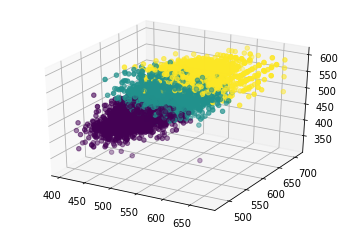

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dataT[3],dataT[4],dataT[5], c=Y)

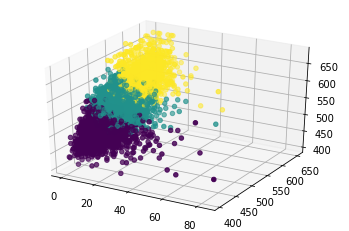

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dataT[1],dataT[2],dataT[3], c=Y)